# Continuum calculation tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import astropy.constants as const
import fiasco
import h5py
import plasmapy.atomic

%matplotlib inline
#%load_ext snakeviz

/Users/willbarnes/anaconda/envs/fiasco/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
t = np.logspace(5,8,61)*u.K
w = np.arange(25,414,1)*u.angstrom
#ion = fiasco.Ion('Fe 9', t)

## Free-bound emission

In [17]:
foo = fiasco.Ion('Fe 10',t)

In [29]:
foo._klgfb

continuum/klgfb -- v8.0.2

Fields
------
l  -- orbital angular momentum number
log_gaunt_factor  -- log free-bound Gaunt factor
log_pe  -- log photon energy divided by ionization potential
n  -- principal quantum number

Footer
------
Log of free-bound Gaunt factors as a function of log of photon energy divided by ionization potential
From Karzas, W. J. and Latter, R., 1961, ApJS, 6, 167

In [23]:
foo._klgfb['log_gaunt_factor'].shape

(21, 41)

In [28]:
foo._klgfb['log_pe'].shape

(21, 41)

In [26]:
foo._klgfb

continuum/klgfb -- v8.0.2

Fields
------
l  -- orbital angular momentum number
log_gaunt_factor  -- log free-bound Gaunt factor
log_pe  -- log photon energy divided by ionization potential
n  -- principal quantum number

Footer
------
Log of free-bound Gaunt factors as a function of log of photon energy divided by ionization potential
From Karzas, W. J. and Latter, R., 1961, ApJS, 6, 167

In [25]:
foo._klgfb['l'].shape

(21,)

In [24]:
foo._klgfb['n'].shape

(21,)

In [18]:
foo._fblvl['n']

array([3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5])

In [5]:
foo._verner

fe/fe_5/continuum/verner_short -- v8.0.2

Fields
------
E_0_fit (eV) -- E_0 fit parameter
E_thresh (eV) -- threshold energy below which cross-section is 0
P_fit  -- P fit parameter
l  -- orbital angular momentum number
n  -- principal quantum number
sigma_0 (Mbarn) -- nominal value of cross-section
y_a_fit  -- y_a fit parameter
y_w_fit  -- y_w fit parameter

Footer
------
Fit parameters for calculating partial photoionization cross-sections for individual ions
From Verner, D. A . and Yakovlev, D. G., 1995, A&AS, 109, 125

In [7]:
(const.h * const.c / w).to(u.erg)

<Quantity [7.94578330e-10, 7.64017625e-10, 7.35720676e-10, 7.09444937e-10,
           6.84981319e-10, 6.62148608e-10, 6.40788976e-10, 6.20764320e-10,
           6.01953280e-10, 5.84248772e-10, 5.67555950e-10, 5.51790507e-10,
           5.36877250e-10, 5.22748901e-10, 5.09345083e-10, 4.96611456e-10,
           4.84498982e-10, 4.72963291e-10, 4.61964145e-10, 4.51464960e-10,
           4.41432405e-10, 4.31836049e-10, 4.22648048e-10, 4.13842880e-10,
           4.05397107e-10, 3.97289165e-10, 3.89499181e-10, 3.82008812e-10,
           3.74801099e-10, 3.67860338e-10, 3.61171968e-10, 3.54722469e-10,
           3.48499267e-10, 3.42490659e-10, 3.36685733e-10, 3.31074304e-10,
           3.25646856e-10, 3.20394488e-10, 3.15308861e-10, 3.10382160e-10,
           3.05607050e-10, 3.00976640e-10, 2.96484451e-10, 2.92124386e-10,
           2.87890699e-10, 2.83777975e-10, 2.79781102e-10, 2.75895253e-10,
           2.72115866e-10, 2.68438625e-10, 2.64859443e-10, 2.61374451e-10,
           2.57979977e-10

In [7]:
foo._verner_cross_section(const.h * const.c / w).to(u.Mbarn)

<Quantity [1.65966909e-08, 2.40144643e-08, 3.42395496e-08, 4.81571259e-08,
           6.68795834e-08, 9.17923606e-08, 1.24606634e-07, 1.67419532e-07,
           2.22782580e-07, 2.93779101e-07, 3.84111340e-07, 4.98198084e-07,
           6.41283600e-07, 8.19558710e-07, 1.04029486e-06, 1.31199207e-06,
           1.64454160e-06, 2.04940431e-06, 2.53980558e-06, 3.13094776e-06,
           3.84024098e-06, 4.68755351e-06, 5.69548227e-06, 6.88964480e-06,
           8.29899342e-06, 9.95615261e-06, 1.18977805e-05, 1.41649558e-05,
           1.68035902e-05, 1.98648683e-05, 2.34057155e-05, 2.74892942e-05,
           3.21855304e-05, 3.75716704e-05, 4.37328694e-05, 5.07628124e-05,
           5.87643681e-05, 6.78502770e-05, 7.81438740e-05, 8.97798474e-05,
           1.02905033e-04, 1.17679246e-04, 1.34276151e-04, 1.52884169e-04,
           1.73707426e-04, 1.96966736e-04, 2.22900633e-04, 2.51766434e-04,
           2.83841349e-04, 3.19423636e-04, 3.58833786e-04, 4.02415766e-04,
           4.50538297e-04

In [17]:
energy = const.h * const.c / w
v = foo._verner
y = (energy / v['E_0_fit']).decompose()
Q = 5.5 + v['l'] + 0.5*v['P_fit']
F = ((y - 1)**2 + v['y_w_fit'])*(y**(-Q))*(1. + np.sqrt(y / v['y_a_fit']))**(-v['P_fit'])
verner_xs =  np.where(energy < v['E_thresh'], 0, F.decompose().value) * v['sigma_0'].to(u.cm**2)

In [18]:
verner_xs

<Quantity [1.65966909e-26, 2.40144643e-26, 3.42395496e-26, 4.81571259e-26,
           6.68795834e-26, 9.17923606e-26, 1.24606634e-25, 1.67419532e-25,
           2.22782580e-25, 2.93779101e-25, 3.84111340e-25, 4.98198084e-25,
           6.41283600e-25, 8.19558710e-25, 1.04029486e-24, 1.31199207e-24,
           1.64454160e-24, 2.04940431e-24, 2.53980558e-24, 3.13094776e-24,
           3.84024098e-24, 4.68755351e-24, 5.69548227e-24, 6.88964480e-24,
           8.29899342e-24, 9.95615261e-24, 1.18977805e-23, 1.41649558e-23,
           1.68035902e-23, 1.98648683e-23, 2.34057155e-23, 2.74892942e-23,
           3.21855304e-23, 3.75716704e-23, 4.37328694e-23, 5.07628124e-23,
           5.87643681e-23, 6.78502770e-23, 7.81438740e-23, 8.97798474e-23,
           1.02905033e-22, 1.17679246e-22, 1.34276151e-22, 1.52884169e-22,
           1.73707426e-22, 1.96966736e-22, 2.22900633e-22, 2.51766434e-22,
           2.83841349e-22, 3.19423636e-22, 3.58833786e-22, 4.02415766e-22,
           4.50538297e-22

## Free-free emission

In [ ]:
ff_total = np.zeros(t.shape+w.shape) * u.erg * u.cm**3 / u.s / u.angstrom

In [84]:
for i in fiasco.list_ions():
    ion = fiasco.Ion(i,t)
    ff_total += ion.free_free(w)

In [81]:
#%%timeit
#ff_cont = ion.free_free(w) #/ ((const.h*const.c/w).cgs/u.photon)

196 ms ± 6.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
wmesh,tmesh = np.meshgrid(w,t)

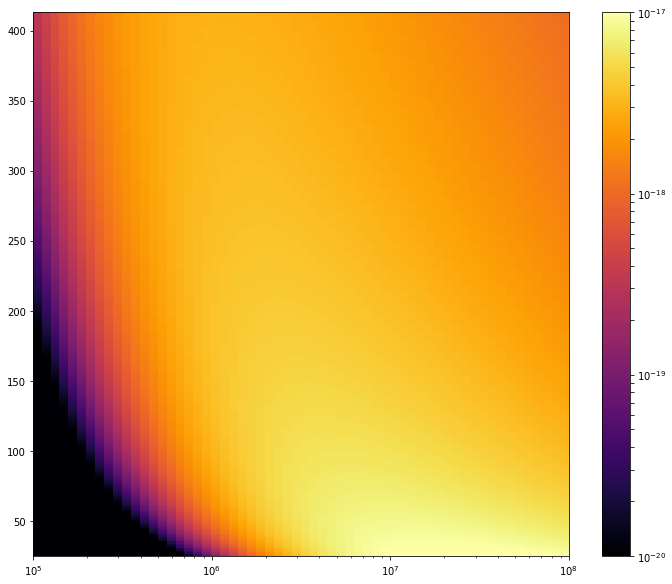

In [101]:
plt.figure(figsize=(12,10))
norm = matplotlib.colors.LogNorm(vmin=1e-20,vmax=1e-17)
plt.pcolormesh(tmesh.value,
               wmesh.value,
               ff_total.value / (const.h*const.c/w).cgs.value,
               cmap='inferno',
               norm=norm
              )
plt.xscale('log')
plt.colorbar()

In [100]:
ff_total.to(u.erg * u.cm**3 / u.s / u.angstrom)

<Quantity [[9.81061670e-51, 8.36802461e-50, 6.07358609e-49, ...,
            1.54529063e-29, 1.55116756e-29, 1.55702043e-29],
           [4.84162565e-48, 3.24629557e-47, 1.88550000e-46, ...,
            2.14716399e-29, 2.15336354e-29, 2.15952626e-29],
           [1.21000529e-45, 6.54673266e-45, 3.11746950e-44, ...,
            2.86411420e-29, 2.87005180e-29, 2.87594021e-29],
           ...,
           [7.99050156e-27, 7.47694272e-27, 7.01287523e-27, ...,
            5.42435428e-29, 5.40015890e-29, 5.37612890e-29],
           [7.81063390e-27, 7.30544806e-27, 6.84922751e-27, ...,
            5.22023887e-29, 5.19691756e-29, 5.17375584e-29],
           [7.62603761e-27, 7.12989959e-27, 6.68210316e-27, ...,
            5.02200011e-29, 4.99953032e-29, 4.97721446e-29]] cm3 erg / (Angstrom s)>

In [7]:
#%%timeit
c = fiasco.IonCollection(*[fiasco.Ion(i,t) for i in fiasco.list_ions()])

In [6]:
c = fiasco.IonCollection(*[fiasco.Element(i,t) for i in fiasco.list_elements()])

In [6]:
gf_ff = ion._gaunt_factor_free_free(w)

In [7]:
gf_ff.shape

(500, 500)

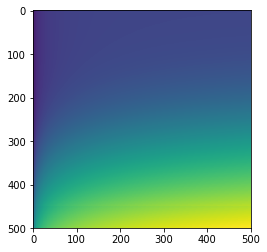

In [8]:
plt.imshow(gf_ff)

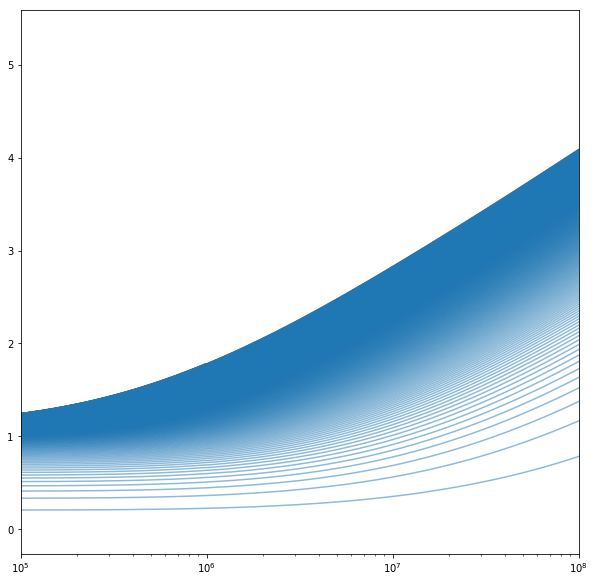

In [19]:
plt.figure(figsize=(10,10))
plt.plot(t,gf_ff,'C0',alpha=0.5);
plt.xscale('log');
plt.xlim(1e5,1e8);

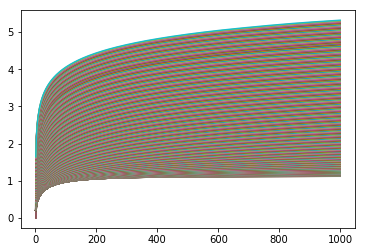

In [11]:
plt.plot(w,gf_ff.T);